In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Excel file
excel_file = pd.ExcelFile('evaluation_results.xlsx')
df = excel_file.parse('evaluation_results')

In [2]:
# Define the color mapping corresponding to each version of the model
version_color = {
    'v3': 'tab:blue',
    'v5': 'tab:green',
    'v6': 'tab:cyan',
    'v7': 'tab:purple',
    'v8': 'tab:orange',
    'v9': 'tab:red',
    'v10': 'tab:pink',
    '11': 'tab:brown',
    'v12': 'tab:gray'
}

# Optimize version matching logic to ensure that all models are mapped correctly
def get_version(model_name):
    for ver in ['v12', '11', 'v10', 'v9', 'v8', 'v7', 'v6', 'v5', 'v3']: 
        if ver in model_name:
            return ver
    return 'v3'  # default value

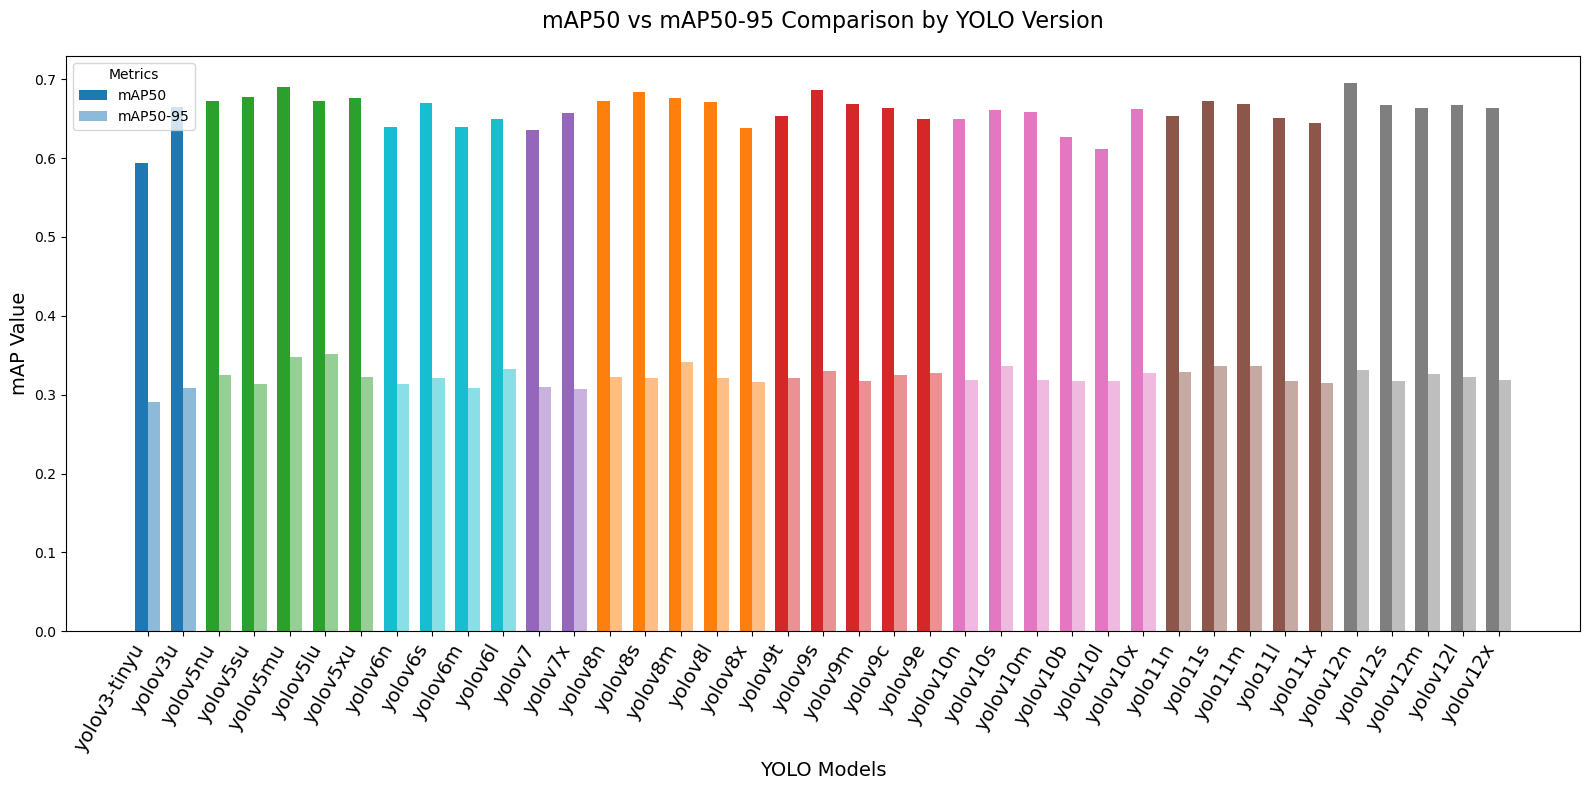

In [3]:
df['version'] = df['Model'].apply(get_version)
df['color'] = df['version'].map(version_color)

plt.figure(figsize=(16, 8))  # Resize the image to accommodate more models
n = len(df)
index = range(n)
bar_width = 0.35

for i in range(n):
    model = df.iloc[i]

    plt.bar(
        i - bar_width/2,
        model['mAP50'],
        bar_width,
        label=f'mAP50' if i == 0 else '',  # Unified legend labels to avoid duplication
        color=model['color']
    )
    
    plt.bar(
        i + bar_width/2,
        model['mAP50_95'],
        bar_width,
        label=f'mAP50-95' if i == 0 else '',
        color=model['color'],
        alpha=0.5  # Decrease transparency, increase discrimination
    )

# 优化坐标轴标签显示
plt.xticks(index, df['Model'], rotation=60, ha='right', fontsize=14)  # Add rotation angle and font adjustment
plt.xlabel('YOLO Models', fontsize=14)
plt.ylabel('mAP Value', fontsize=14)
plt.title('mAP50 vs mAP50-95 Comparison by YOLO Version', fontsize=16, pad=20)

# Optimize legend layout
plt.legend(
    title='Metrics',
    bbox_to_anchor=(0, 1), 
    loc='upper left'
)

plt.tight_layout()  # Automatically adjust the layout
plt.show()

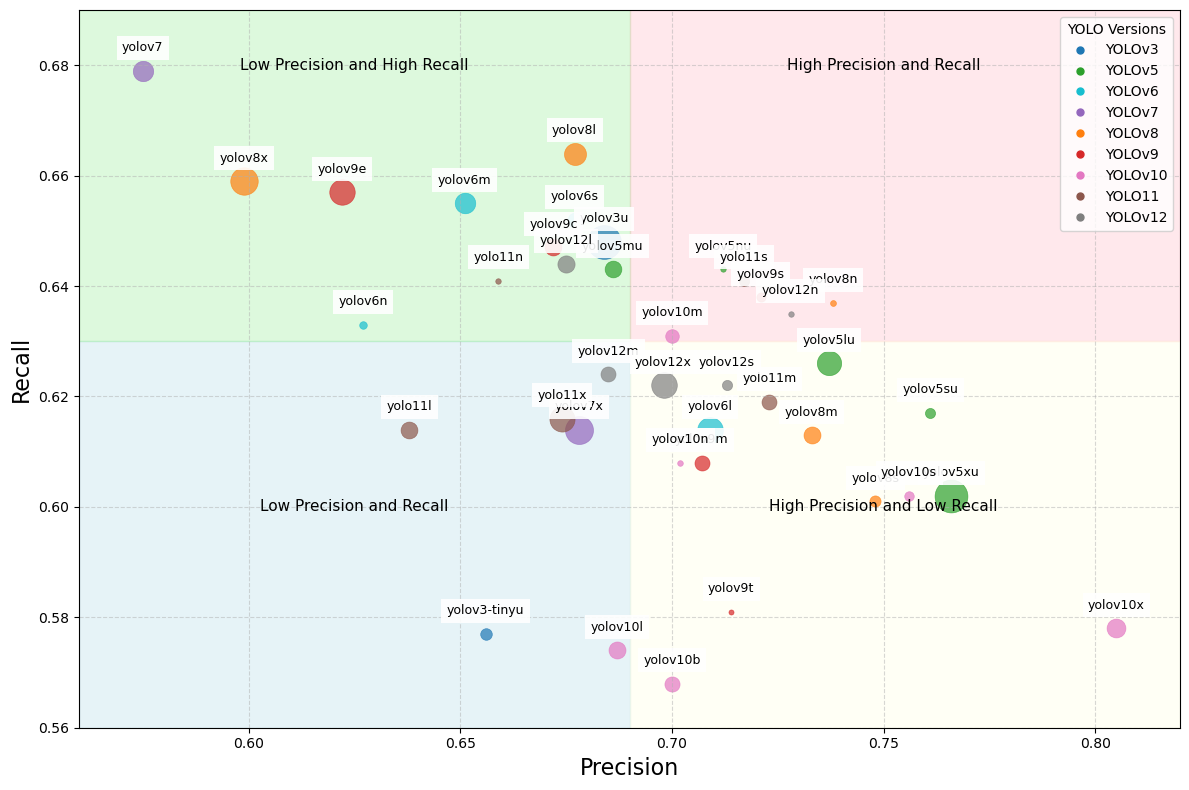

In [4]:
df['version'] = df['Model'].apply(get_version)

plt.figure(figsize=(12, 8))

# Divide four areas and fill them with color
plt.axvline(x=0.9, color='gray', linestyle='--', alpha=0.7)
plt.axhline(y=0.9, color='gray', linestyle='--', alpha=0.7)

# Adjust area fill color
plt.fill_between([0.56, 0.69], 0.56, 0.63, color='lightblue', alpha=0.3)
plt.fill_between([0.56, 0.69], 0.63, 0.69, color='lightgreen', alpha=0.3)
plt.fill_between([0.69, 0.82], 0.63, 0.69, color='lightpink', alpha=0.3)
plt.fill_between([0.69, 0.83], 0.56, 0.63, color='lightyellow', alpha=0.3)

# Add labels at the top of each area
plt.text(0.625, 0.68, 'Low Precision and High Recall', ha='center', va='center', fontsize=11) # false positive
plt.text(0.75, 0.68, 'High Precision and Recall', ha='center', va='center', fontsize=11)
plt.text(0.625, 0.6, 'Low Precision and Recall', ha='center', va='center', fontsize=11)
plt.text(0.75, 0.6, 'High Precision and Low Recall', ha='center', va='center', fontsize=11) # false negative

# Draw the scatter (small circle) and label, adjusting the text to align vertically to the bottom
for _, row in df.iterrows():
    version = row['version']
    color = version_color.get(version, 'black')
    # Resize the circle according to the Model Size and multiply by a factor (3) to control the display
    size = row['Model Size']*3
    plt.scatter(row['Precision'], row['Recall'], c=color, s=size, alpha=0.7, linewidths=0.5)
    plt.text(row['Precision'], row['Recall']+0.003, row['Model'], 
             fontsize=9, ha='center', va='bottom',
             bbox=dict(facecolor='white', alpha=0.9, edgecolor='none'))

# Adjust the axis range
plt.xlim(0.56, 0.82)
plt.ylim(0.56, 0.69)

plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
# plt.title('Precision - Recall Comparison of YOLO Models', fontsize=16, pad=15)

# Processing Legends
handles = []
labels = []
for version, color in version_color.items():
    handle = plt.Line2D([], [], color=color, marker='o', linestyle='', markersize=5)
    handles.append(handle)
    labels.append(f'YOLO{version}')
plt.legend(handles, labels, title='YOLO Versions', loc='upper right')

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

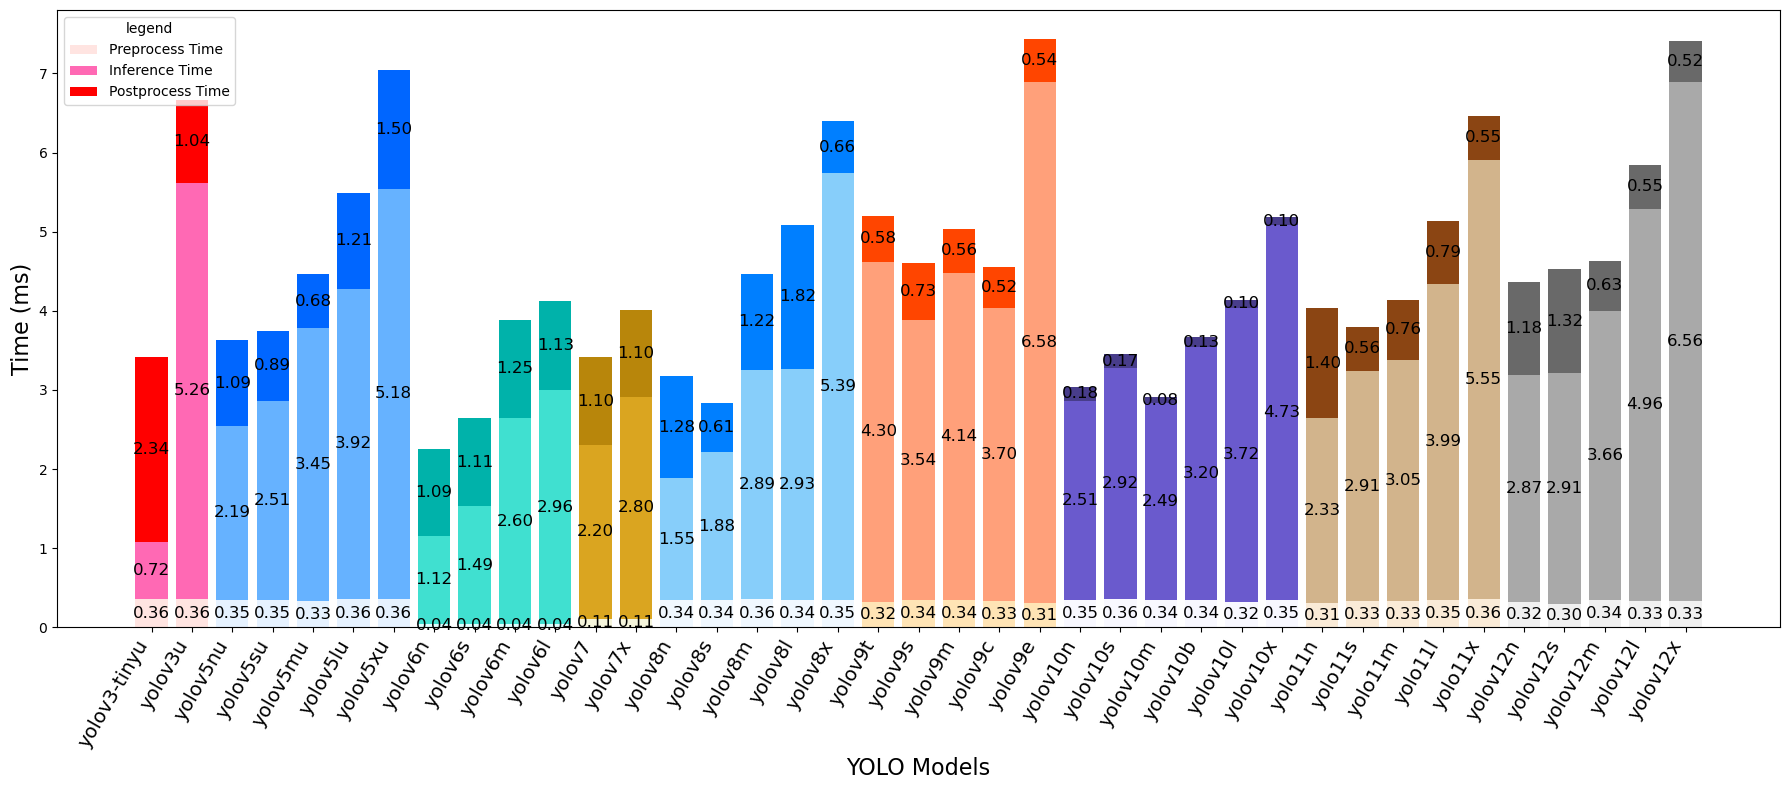

In [5]:
df['version'] = df['Model'].apply(get_version)
plt.figure(figsize=(18, 8))
version_color = {
    'v3': ['#FFE4E1', '#FF69B4', '#FF0000'], 
    'v5': ['#E6F2FF', '#66B2FF', '#0066FF'], 
    'v6': ['#E0FFFF', '#40E0D0', '#00B2AA'], 
    'v7': ['#F5F5DC', '#DAA520', '#B8860B'], 
    'v8': ['#F0F8FF', '#87CEFA', '#007FFF'], 
    'v9': ['#FFE4B5', '#FFA07A', '#FF4500'], 
    'v10': ['#F8F8FF', '#6A5ACD', '#483D8B'], 
    '11': ['#FAEBD7', '#D2B48C', '#8B4513'], 
    'v12': ['#F0F0F0', '#A9A9A9', '#696969']  
}


for idx, model in enumerate(df['Model']):
    ver = df.loc[idx, 'version']
    if ver not in version_color:
        continue
    pre = df.loc[idx, 'Preprocess Time']
    inf = df.loc[idx, 'Inference Time']
    post = df.loc[idx, 'Postprocess Time']
    
    bottom = 0
    for i, time_val in enumerate([pre, inf, post]):
        plt.bar(idx, time_val, bottom=bottom, color=version_color[ver][i], 
                label='Preprocess Time' if i == 0 and idx == 0 else 
                'Inference Time' if i == 1 and idx == 0 else 'Postprocess Time' if i == 2 and idx == 0 else '')
        # Add numeric annotation
        if time_val > 0:  # Avoid labeling 0 values
            plt.text(idx, bottom + time_val / 2, f'{time_val:.2f}', ha='center', va='center', fontsize=12)
        bottom += time_val

plt.xlabel('YOLO Models', fontsize=16)
plt.ylabel('Time (ms)', fontsize=16)
#plt.title('Processing Time Comparison of YOLO Models', fontsize=12, pad=20)
plt.xticks(range(len(df)), df['Model'], rotation=60, ha='right', fontsize=14) 
plt.legend(title='legend',  loc='upper left')
plt.tight_layout()
plt.show()

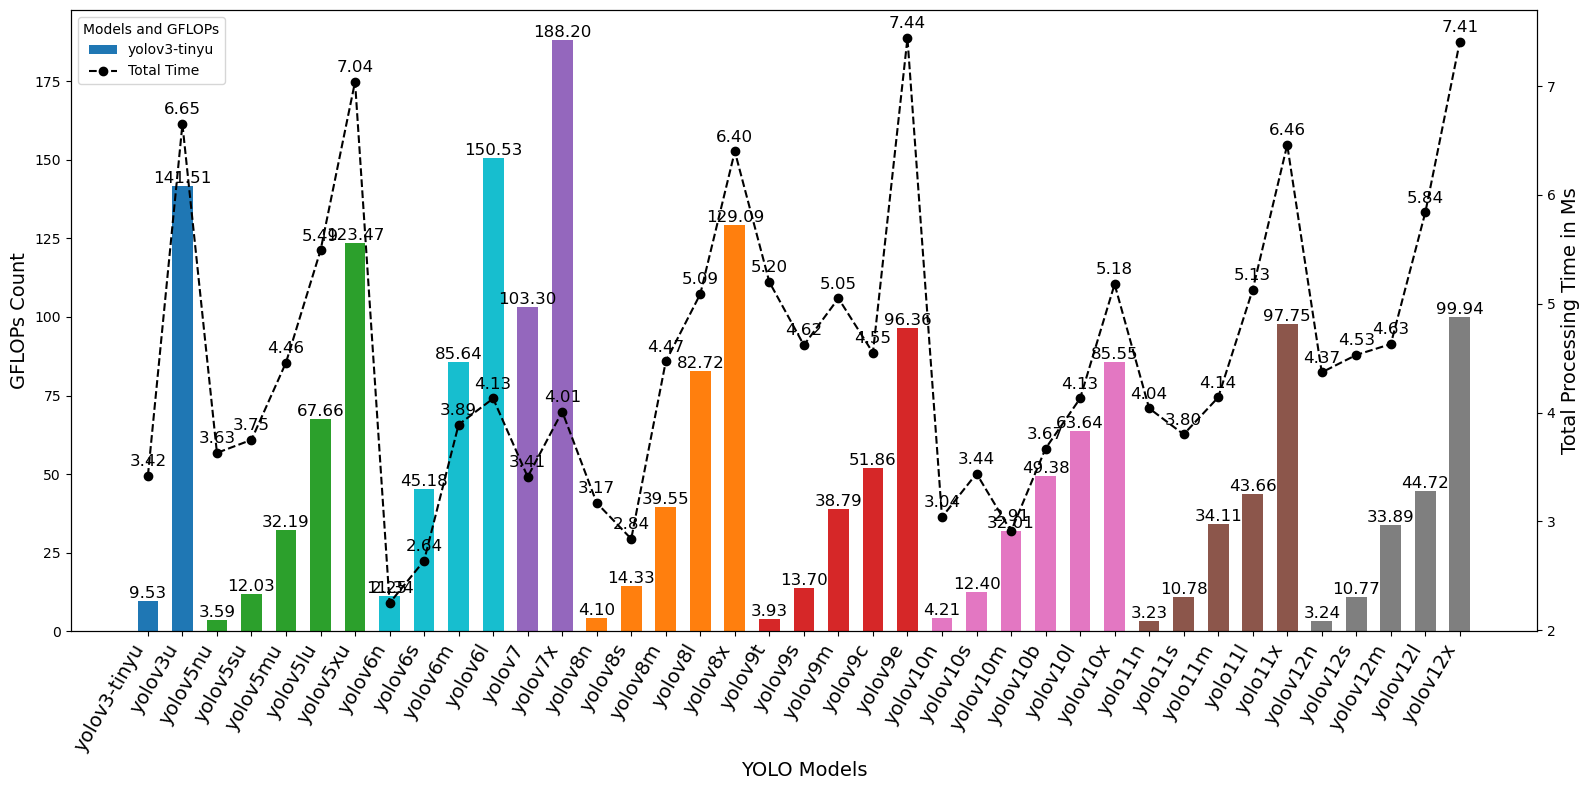

In [6]:
df['version'] = df['Model'].apply(get_version)

version_color = {
    'v3': 'tab:blue',
    'v5': 'tab:green',
    'v6': 'tab:cyan',
    'v7': 'tab:purple',
    'v8': 'tab:orange',
    'v9': 'tab:red',
    'v10': 'tab:pink',
    '11': 'tab:brown',
    'v12': 'tab:gray'
}

plt.figure(figsize=(16, 8))
ax1 = plt.gca()
ax2 = ax1.twinx()

x_times = []  
y_times = []  

for idx, row in df.iterrows():
    model = row['Model']
    ver = row['version']
    if ver not in version_color:
        continue
    gf = row['GFLOPs']
    total_time = row['Total Time']
    color = version_color[ver]
    ax1.bar(idx, gf, width=0.6, color=color, label=f'{model}' if idx == 0 else "")
    x_times.append(idx)  
    y_times.append(total_time) 
    ax1.text(idx, gf, f'{gf:.2f}', ha='center', va='bottom', fontsize=12)

# Draw line graphs uniformly (key modification: draw lines connecting all points at once)
ax2.plot(x_times, y_times, marker='o', color='black', linestyle='--', label='Total Time')

# Add numeric annotation
for x, y in zip(x_times, y_times):
    ax2.text(x, y + 0.2, f'{y:.2f}', ha='center', va='top', fontsize=12)

ax1.set_xlabel('YOLO Models', fontsize=14)
ax1.set_ylabel('GFLOPs Count', fontsize=14, color='black')
ax2.set_ylabel('Total Processing Time in Ms', fontsize=14, color='black')
ax1.set_xticks(range(len(df)))
ax1.set_xticklabels(df['Model'], rotation=60, ha='right', fontsize=14)

# Processing Legends
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

unique_handles = []
unique_labels = []
for h, l in zip(handles1, labels1):
    if l not in unique_labels:
        unique_handles.append(h)
        unique_labels.append(l)

line_handle = plt.Line2D([], [], color='black', marker='o', linestyle='--', label='Total Time')
unique_handles.append(line_handle)
unique_labels.append('Total Time')

plt.legend(unique_handles, unique_labels, title='Models and GFLOPs', loc='upper left')
plt.tight_layout()
plt.show()

# Comprehensive evaluation (entropy weight)

In [8]:
import pandas as pd
import numpy as np

excel_file = pd.ExcelFile('evaluation_results.xlsx')

# Get the data in the specified worksheet
df = excel_file.parse('evaluation_results')

# Review the basic information of the data
print('Data basic information：')
df.info()

# View an example of the first row of the dataset
print(df.head(1).to_csv(sep='\t', na_rep='nan'))

# Keep only required columns
data = df.loc[:, ['mAP50', 'mAP50_95', 'Precision', 'Recall',
                  'Total Time', 'GFLOPs', 'Model Size']]

# Handling missing values
data.fillna(data.min(numeric_only=True), inplace=True)

# Define efficiency metrics and cost metrics
positive_indices = ['mAP50', 'mAP50_95', 'Precision', 'Recall']
negative_indices = ['Total Time', 'GFLOPs', 'Model Size']

# Data normalization (vectorization)
normalized_data = pd.DataFrame()

pos_data = data[positive_indices]
pos_min = pos_data.min()
pos_max = pos_data.max()
pos_range = pos_max - pos_min
pos_range[pos_range == 0] = 1e-8  # Avoid dividing by zero
normalized_data[pos_data.columns] = (pos_data - pos_min) / pos_range

neg_data = data[negative_indices]
neg_min = neg_data.min()
neg_max = neg_data.max()
neg_range = neg_max - neg_min
neg_range[neg_range == 0] = 1e-8 
normalized_data[neg_data.columns] = (neg_max - neg_data) / neg_range


# Entropy weight calculation index weight
def entropy_weight(df):
    col_sums = df.sum(axis=0)
    # Prevent division by zero
    col_sums[col_sums == 0] = 1e-8
    p = df / col_sums
    p = p.replace(0, 1e-8)
    e = - (p * np.log(p)).sum(axis=0) / np.log(p.shape[0])
    g = 1 - e
    return g / g.sum()


weights = entropy_weight(normalized_data)

# Calculate a composite score and sort it
scores = (normalized_data * weights).sum(axis=1)
result_df = pd.DataFrame({
    'Model': df['Model'],
    'Composite score': scores
})
result_df_sort = result_df.sort_values('Composite score', ascending=False).reset_index(drop=True)

# 输出信息
print("Indicator classification：")
print("   Efficiency metrics（The bigger, the better.）：mAP50, mAP50_95, Precision, Recall")
print("   Cost metrics（Smaller is better.）：Total Time、GFLOPs、Model Size")
print("\n【Weight distribution of each indicator】")
print(weights.round(3))
print("\n【Model comprehensive score】")
print(result_df_sort.round(3))


Data basic information：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Model                39 non-null     object 
 1   mAP50                39 non-null     float64
 2   mAP50_95             39 non-null     float64
 3   Precision            39 non-null     float64
 4   Recall               39 non-null     float64
 5   Preprocess Time      39 non-null     float64
 6   Inference Time       39 non-null     float64
 7   Postprocess Time     39 non-null     float64
 8   Total Time           39 non-null     float64
 9   GFLOPs               39 non-null     float64
 10  Model Size           39 non-null     float64
 11  Comprehensive score  1 non-null      float64
dtypes: float64(11), object(1)
memory usage: 3.8+ KB
	Model	mAP50	mAP50_95	Precision	Recall	Preprocess Time	Inference Time	Postprocess Time	Total Time	GFLOPs	Model Size	Comp

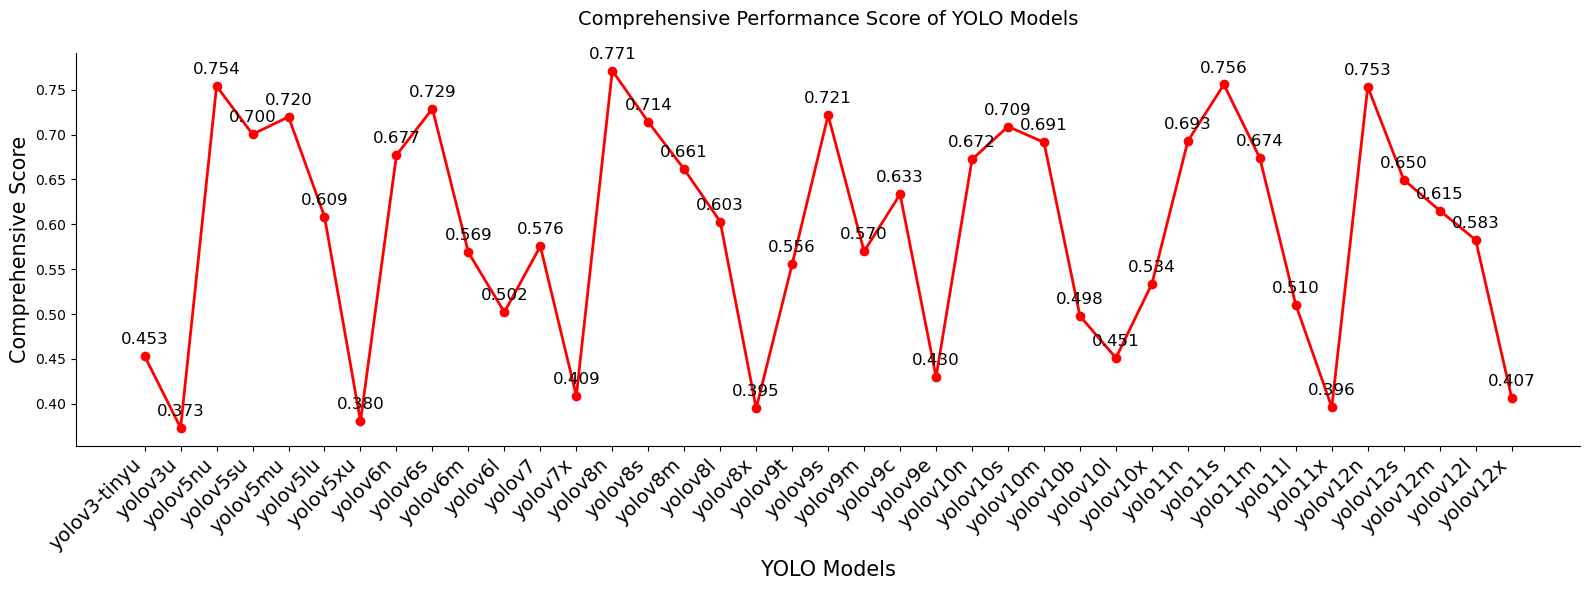

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

models = result_df['Model']
scores = result_df['Composite score']

plt.figure(figsize=(16, 6))  

# Draw line charts, add markers and colors
plt.plot(models, scores, marker='o', linestyle='-', color='red', linewidth=2)

# Add numeric annotations, centred vertically above the data points
for x, y in zip(models, scores):
    plt.text(x, y+0.01, f'{y:.3f}', ha='center', va='bottom', fontsize=12)

plt.xlabel('YOLO Models', fontsize=15)
plt.ylabel('Comprehensive Score', fontsize=15)
plt.title('Comprehensive Performance Score of YOLO Models', fontsize=14, pad=20)

plt.xticks(rotation=45, ha='right', fontsize=14)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()